In [2]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("train.csv")
np.corrcoef(df["Item_Weight"],df["Item_Outlet_Sales"])

array([[nan, nan],
       [nan,  1.]])

In [7]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [19]:
from scipy import stats

stats.pearsonr(df.Item_Visibility,df.Item_MRP)

PearsonRResult(statistic=-0.0072918621657671765, pvalue=0.61911033306142)

In [20]:
df.dropna(inplace=True) 

coeff_df=pd.DataFrame(columns=['r','p'])
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r,p=stats.pearsonr(df.Item_Outlet_Sales,df[col])
        coeff_df.loc[col]=[round(r,3),round(p,3)]
coeff_df   

,r,p
Item_Weight,0.011,0.454
Item_Visibility,-0.010,0.511
Item_MRP,0.680,0.000
Outlet_Establishment_Year,-0.041,0.005
Item_Outlet_Sales,1.000,0.000


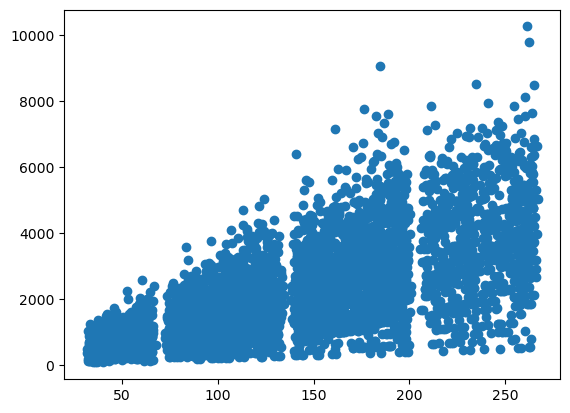

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df.Item_MRP,df.Item_Outlet_Sales)

In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model=ols(formula='Item_Outlet_Sales~Item_MRP',data=df).fit()
white_test=het_white(model.resid,model.model.exog)
breuschpagan_test=het_breuschpagan(model.resid,model.model.exog)

output_df=pd.DataFrame(columns=['LM stats','LM p','F stats','F p'])
output_df.loc['white']=white_test
output_df.loc['breuschpagan']=breuschpagan_test

output_df

,LM stats,LM p,F stats,F p
white,700.254270,8.744146e-153,411.935579,2.001967e-165
breuschpagan,685.171457,5.015536e-151,803.231943,3.948578e-163
